# Uncertainty-Aware Regression

Ransalu Senanayake

**To be completed**

 ------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as pl

## 1. Simple Linear Regression - no uncertainty

Let us consider a dataset.

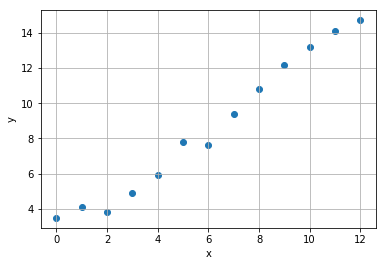

In [15]:
y = np.array([3.5, 4.1, 3.8, 4.9, 5.9, 7.8, 7.6, 9.4, 10.8, 12.2, 13.2, 14.1, 14.7])[:,np.newaxis]
X = np.arange(y.shape[0])[None,:]

#scatter plot of y vs. X
pl.scatter(X, y)
pl.xlabel('x')
pl.ylabel('y')
pl.grid()

Our objective is to fit a model. Linear regression is a good choice here. 

***Objective***: Estimate (a.k.a. predict or query) outputs for unknown inputs, given the training data $\{X,\mathbf{y}\}$.

Let us assume the relationship between input and output can be modelled by,
\begin{equation}
y \approx f(x) = w_0 +  w_1 x
\end{equation}

If $w_0$ and $w_1$ are known, it is possible to calculate $y$ for any unknown $x$. Our objective is to determine the "best" $w_0$ and $w_1$ values using training data $\{X,\mathbf{y}\}$.

More generally, if X is $D-$dimensional,

\begin{equation}
y = w_0 +  w_1 x^{(1)} + w_2 x^{(3)} + w_3 x^{(3)} + ... + w_p x^{(D)},
\end{equation}

where $^{(d)}$ indicates the $d-$th dimension of $X$ for $d=1,\dots,D$. Here, all $w_d$ values have to be estimated. 


***Method***:
For each sample in the training dataset $\{x_i, y_i\}_{i=1}^{N}$,
\begin{equation}
y_i = (w_0 +  w_1 x_i^{(1)} + w_2 x_i^{(2)} + w_3 x_i^{(3)} + ... + w_p x_i^{(D)})  + e_i.
\end{equation}

where $e_i = (y_i - \hat{y}_i)$ is the error between *actual* and *estimated* outputs for a given choice of $w_d$ values.

This can also be represented as,

\begin{equation}
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_N
\end{bmatrix} =
 \begin{bmatrix}
  1 & x_1^{(1)} & \cdots & x_1^{(D)} \\
  1 & x_2^{(1)} & \cdots & x_2^{(D)} \\
  1 & x_3^{(1)} & \cdots & x_3^{(D)} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_N^{(1)} & \cdots & x_N^{(D)}
 \end{bmatrix} 
 \begin{bmatrix}
  w_0 \\
  w_1 \\
  \vdots \\ 
  w_D 
 \end{bmatrix}
 +
\begin{bmatrix}
e_1 \\
e_2 \\
e_3 \\
\vdots \\
e_N
\end{bmatrix}
\end{equation}

For simplicity, let us denote the same model as,

\begin{equation}
 \mathbf{y} = X\mathbf{w} + \mathbf{e}.
\end{equation}

If error $\mathbf{e}$ is negligible, $\mathbf{y} \approx X\mathbf{w}$. Based on ordinary least square (OLS) method or maximum likelihood estimation (MLE) under the assumption of normally distributed error, it can be shown that $\mathbf{e}$ is minimum if $\mathbf{w}$ is selected (let us call it $\hat{\mathbf{w}}$) as,

\begin{equation}
  \hat{\mathbf{w}} = (X^{\top}X)^{-1}X^{\top}\mathbf{y}
\end{equation}

In other words, we can cosider this as a minimization problem in the following form.
\begin{equation}
 \hat{\mathbf{w}} = \underset{\mathbf{w}}{\operatorname{argmin}} \| X\mathbf{w - y}\|_2^2
\end{equation}

Now, $\mathbf{\hat{y}}$ can be estimated for unknown $X_q$ based on,
\begin{equation}
 \mathbf{\hat{y}} = X_q\mathbf{\hat{w}}
\end{equation}

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.36686391e-06, 4.73372781e-06, 7.10059172e-06,
        9.46745562e-06, 1.18343195e-05, 1.42011834e-05, 1.65680473e-05,
        1.89349112e-05, 2.13017751e-05, 2.36686391e-05, 2.60355030e-05,
        2.84023669e-05],
       [0.00000000e+00, 4.73372781e-06, 9.46745562e-06, 1.42011834e-05,
        1.89349112e-05, 2.36686391e-05, 2.84023669e-05, 3.31360947e-05,
        3.78698225e-05, 4.26035503e-05, 4.73372781e-05, 5.20710059e-05,
        5.68047337e-05],
       [0.00000000e+00, 7.10059172e-06, 1.42011834e-05, 2.13017751e-05,
        2.84023669e-05, 3.55029586e-05, 4.26035503e-05, 4.97041420e-05,
        5.68047337e-05, 6.39053254e-05, 7.10059172e-05, 7.81065089e-05,
        8.52071006e-05],
       [0.00000000e+00, 9.46745562e-

In [17]:
w_hat = (np.linalg.pinv(X.T.dot(X))).dot(X.T.dot(y))
print('w_hat=\n', w_hat)

"""
Attention! - use np.linalg.pinv instead of np.linalg.inv. 
This is because, when a matrix is singular, we may have to obtain the Moore-Penrose pseudoinverse,
especially when the polynomial order is very high. 
"""

ValueError: shapes (13,1) and (13,1) not aligned: 1 (dim 1) != 13 (dim 0)

Generate 100 query inputs $\mathbf{x}_q$ from $-0.1$ to $1.1$

In [34]:
x_q = np.linspace(-0.1,1.1,100)[:,np.newaxis] 

**Predict:** 
Evaluate $\mathbf{\Phi_{x_q}}$ and hence determine outputs $\hat{\mathbf{y}}$.

In [35]:
ϕ_x_q = generate_feature_mat(x_q, p) #generate feature matrix for x_q

y_hat = ϕ_x_q.dot(w_hat) #estimated outputs (N_qx1 matrix)

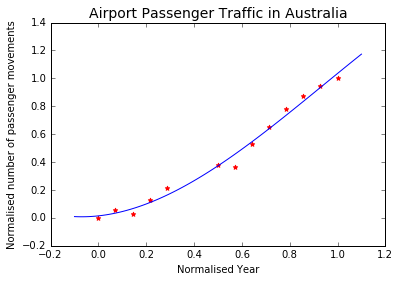

In [36]:
pl.scatter(x, y, marker='*', color='r')
pl.plot(x_q, y_hat)
pl.title('Airport Passenger Traffic in Australia', fontsize=14)
pl.xlabel('Normalised Year')
pl.ylabel('Normalised number of passenger movements')

Tikhonov ($\mathrm{L}^2$) regularization can be used to overcome overfitting. 

\begin{equation}
  \hat{\mathbf{w}} = (\mathbf{\Phi_x}^{\top}\mathbf{\Phi_x} + \gamma \mathbf{I})^{-1}\mathbf{\Phi_x^{\top} y}
\end{equation}

In other words, we can cosider this as a minimization problem in the following form.
\begin{equation}
 \hat{\mathbf{w}} = \underset{\mathbf{w}}{\operatorname{argmin}} \| \mathbf{\Phi_x w - y}\|_2^2
 + \gamma \| \mathbf{w} \|_2^2
\end{equation}

**Exercise 1.3**: Test the following code for different values of the regularization parameter $\gamma$.

You may refer http://scikit-learn.org/stable/modules/linear_model.html.

**Exercise 1.4**:

Training data were normalized before analysis. Try to perform regression analysis with the original dataset (without normalization) and discuss the importance of data pre-processing. Further discuss how to improve the numerical stability of your algorithm. 

In [39]:
##Answer 
"""
y values are extremely high. 
Numerical stability large i/o values? - normalization - be sensible - what if y is normalized, but
not x.
y = 0.5 = w2.19862 + w1.19861 + w0. . . ==> w0, w1 & w0 will be extremeny small!! Using
np.linalg.solve() instead of np.linalg.inv() *matrix is not singular ??

#w_hat = (np.linalg.solve(ϕ_x.T.dot(ϕ_x), np.diag(np.ones(ϕ_x.shape[1])) )).dot(ϕ_x.T.dot(y))
"""

'\ny values are extremely high. \nNumerical stability large i/o values? - normalization - be sensible - what if y is normalized, but\nnot x.\ny = 0.5 = w2.19862 + w1.19861 + w0. . . ==> w0, w1 & w0 will be extremeny small!! Using\nnp.linalg.solve() instead of np.linalg.inv() *matrix is not singular ??\n\n#w_hat = (np.linalg.solve(ϕ_x.T.dot(ϕ_x), np.diag(np.ones(ϕ_x.shape[1])) )).dot(ϕ_x.T.dot(y))\n'

## 2. Bayesian Linear Regression

#### Recap: Bayes Rule

\begin{equation}
    p(Y=y|X=x) = \frac{p(X=x|Y=y) p(Y=y)}{\sum_{y'} p(X=x|Y=y')p(Y=y')}
\end{equation}

**Exercise 4.1.1** 

0.4% of a population is having a particular genetic disorder. In order to test the disorder, a person has undergone a medical test which has a **sensitivity** of 80% (if a person has the disorder, the test result will be positive with a probability of 0.8) and a **false alarm** of 10%. If the test is positive, what is the probability of person the having the particular genetic disorder?

Answer


Let $x=1$ be positive test results and $x=0$ be negative test results.

Let $y=1$ be the person has a cancer and $y=0$ be the person does not have a cancer.

* prior: $p(Y=1) = 0.004$ and $p(Y=0) = 1-0.004 = 0.996$

* sensitivity: $p(X=1|Y=1) = 0.8$

* false positive/alarm: $p(X=1|Y=0) = 0.1$

\begin{equation}
    p(Y=1|X=1) = \frac{p(X=1|Y=1) p(Y=1)}{p(X=1|Y=1)p(Y=1)+p(X=1|Y=0)p(Y=0)} 
    = \frac{0.8 \times 0.004}{0.8 \times 0.004 + 0.1 \times 0.996}
    = 0.0311 \approx 3\%
\end{equation}

### Bayesian Linear regression

\begin{equation}
    \underbrace{p(\mathbf{w},|\mathbf{x,y})}_\text{posterior} 
    = \frac{
    	\overbrace{p(\mathbf{y} \vert \mathbf{x,w})}^\text{likelihood} 
        \times 
        \overbrace{p(\mathbf{w})}^\text{prior}
         } 
    {\underbrace{p(\mathbf{y})}_\text{marginal likelihood}}
\end{equation}


Let us consider a uniform prior: $\mathbf{m}_0=\mathbf{0}$ and $\mathbf{S}_0 = \alpha^{-1} \mathbf{I}$
\begin{equation}
    p(\mathbf{w}) = \mathcal{N} (\mathbf{w} \vert \mathbf{m}_0, \mathbf{S}_0)
\end{equation}

Then, the posterior is,
\begin{equation}
    p(\mathbf{w|t}) = \mathcal{N} (\mathbf{w} \lvert \mathbf{m}_N, \mathbf{S}_N)
\end{equation}

where $\mathbf{m_N} = \beta \mathbf{S}_N \mathbf{\Phi_x^\top t}$ and 
$\mathbf{S}_N = {( \alpha \mathbf{I} + \beta \mathbf{\Phi_x}^\top \mathbf{\Phi_x} )}^{-1}$

In [45]:
from scipy.stats import multivariate_normal

In [46]:
p = 1
ϕ_x = generate_feature_mat(x, p) 

**Excerise 2.1 **: Complete *TODO* sections.

In [47]:
#prior distribution
alpha = 2**-1
prior = multivariate_normal(np.zeros(p+1), 1/alpha*np.eye(p+1))

#posterior distribution
beta = 0.3**-2
S_N = np.linalg.pinv(alpha*np.eye((p+1)) + beta*ϕ_x.T.dot(ϕ_x))
m_N = beta*S_N.dot(ϕ_x.T.dot(y))
posterior = multivariate_normal(m_N[:,0], S_N)

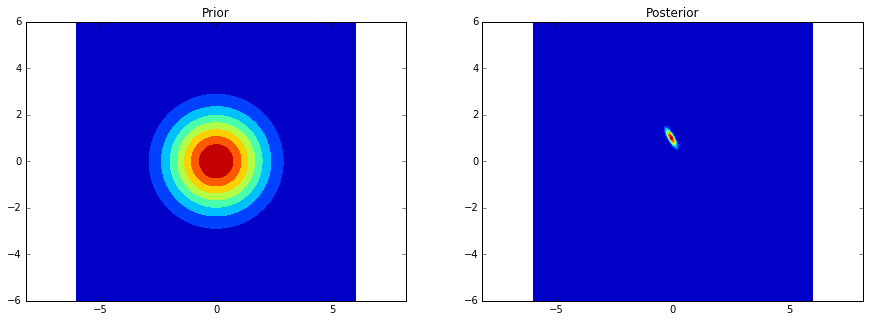

In [48]:
xx, yy = np.meshgrid(np.linspace(-6, 6, 200), np.linspace(-6, 6, 200))
ww = np.vstack((xx.ravel(), yy.ravel())).T

prior_pdf = prior.pdf(ww)
posterior_pdf = posterior.pdf(ww)

fig, ax = pl.subplots(1,2, figsize=(15,5))
ax[0].contourf(xx, yy, prior_pdf.reshape(xx.shape)); ax[0].axis('equal'); ax[0].set_title('Prior')
ax[1].contourf(xx, yy, posterior_pdf.reshape(xx.shape)); ax[1].axis('equal'); ax[1].set_title('Posterior')

Predictive distribution is given by,
\begin{equation}
    p(y \lvert x_q, \mathbf{x, y}, \alpha, \beta) = \mathcal{N}(\mu_q, \sigma^2_q)
\end{equation}

where $\mu_q = \mathbf{m}_N^\top \mathbf{\Phi_{x_q}}$ and
$\sigma^2_q = \beta^{-1} \mathbf{\Phi_{x_q}}^\top \mathbf{S}_N \mathbf{\Phi_{x_q}}^\top$.

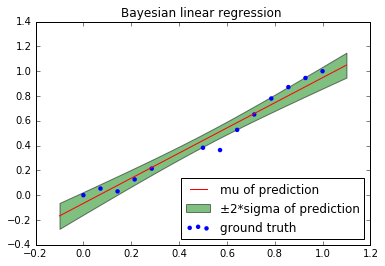

In [22]:
x_q = np.linspace(-0.1, 1.1, 200)[:,np.newaxis] 
ϕ_x_q = generate_feature_mat(x_q, p) 

mu_q = m_N.T.dot(ϕ_x_q.T).ravel()
sigma_q = np.sqrt(np.diag(ϕ_x_q.dot(S_N.dot(ϕ_x_q.T))/beta))

pl.fill_between(x_q.ravel(), mu_q-2*sigma_q, mu_q+2*sigma_q, \
                facecolor='green', interpolate=True, alpha=0.5, label='±2*sigma of prediction')
pl.scatter(x, y, label='ground truth', edgecolors='')
pl.plot(x_q, mu_q, c='r', label='mu of prediction')
pl.legend(loc='lower right')
pl.title('Bayesian linear regression ')

**Excerise 2.2 (optional)**: Consider the problem of adding data points sequentially. Perform sequential Bayesian linear regression and demonstrate how the posterior is converged. Refer Figure 3.7 of Bishop's *Pattern Recognition and Machine Learning*.
Hint: The posterior in step *i* is used as the prior for step *i+1*.

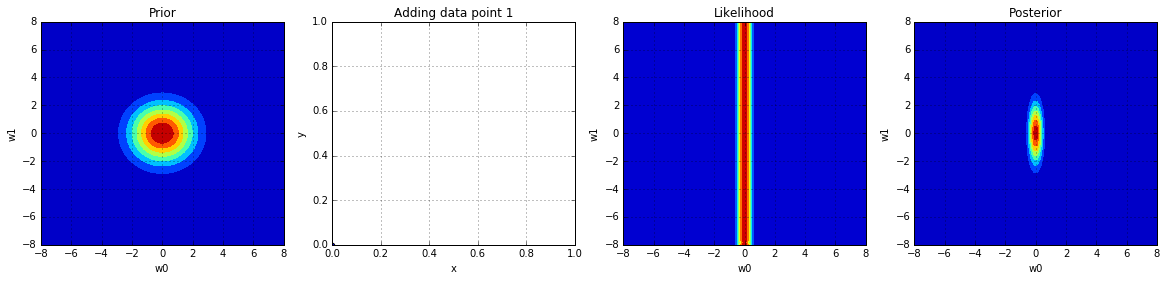

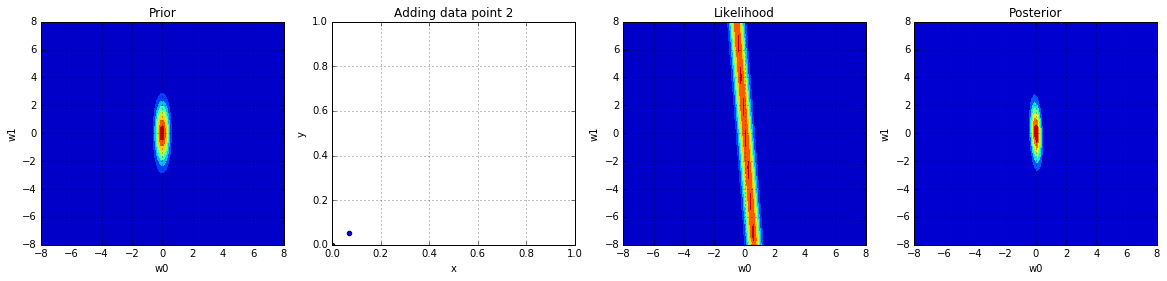

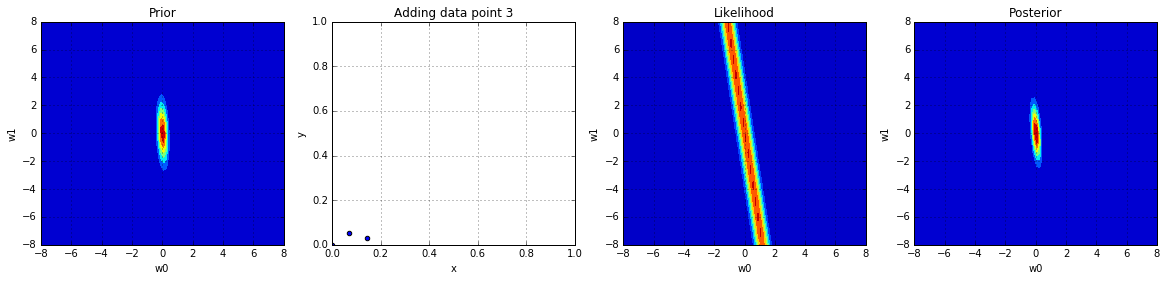

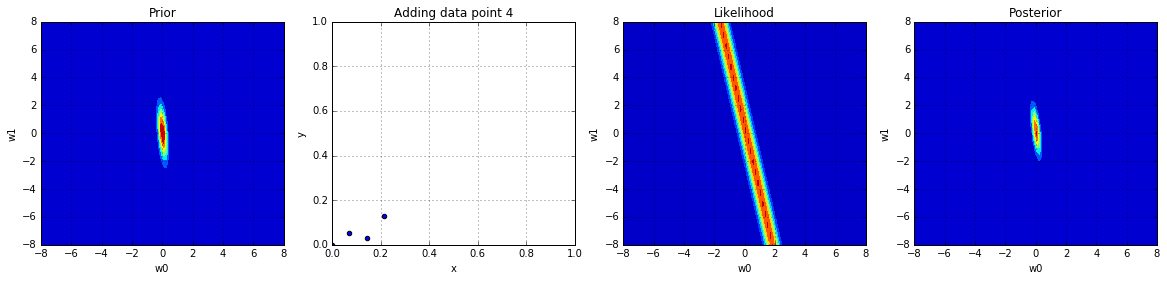

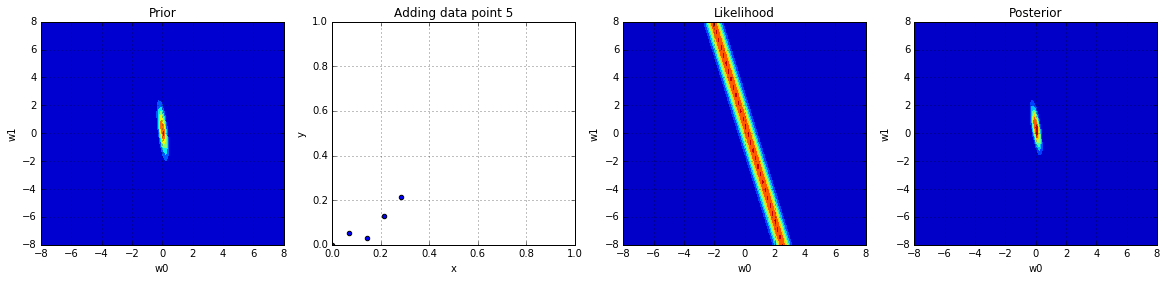

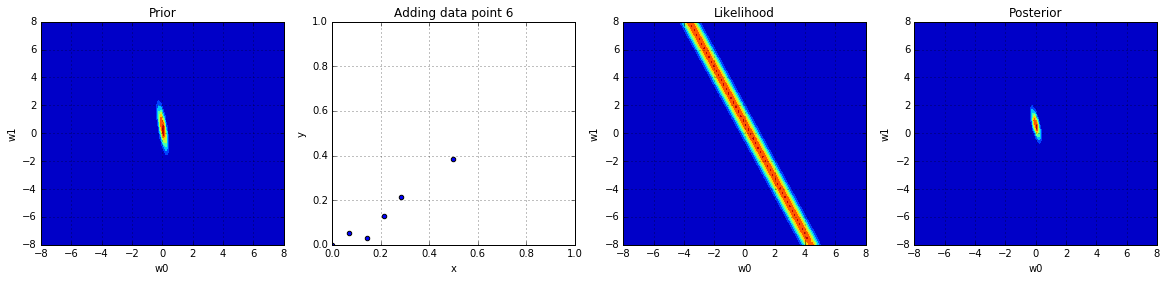

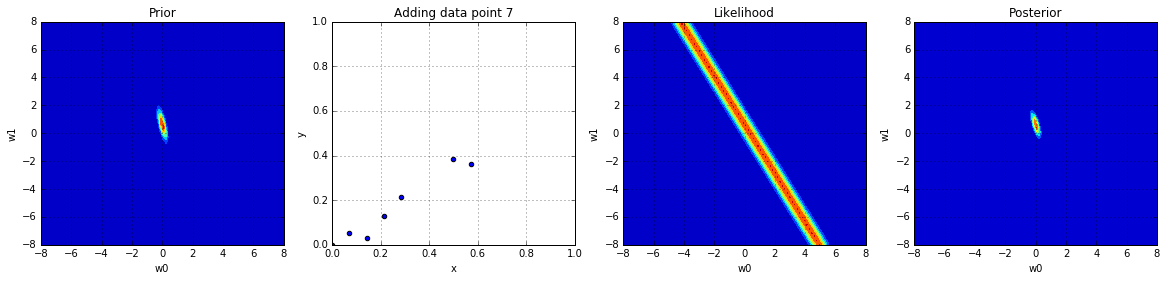

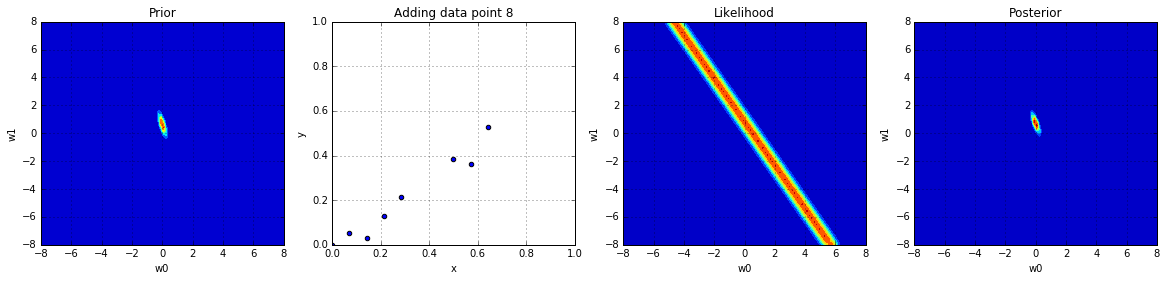

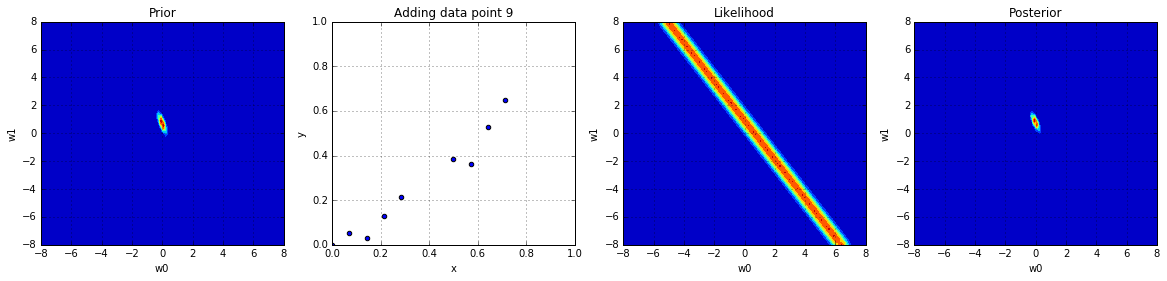

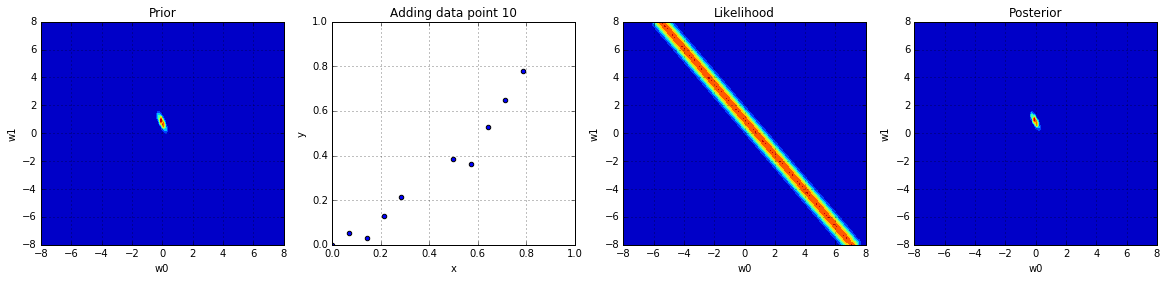

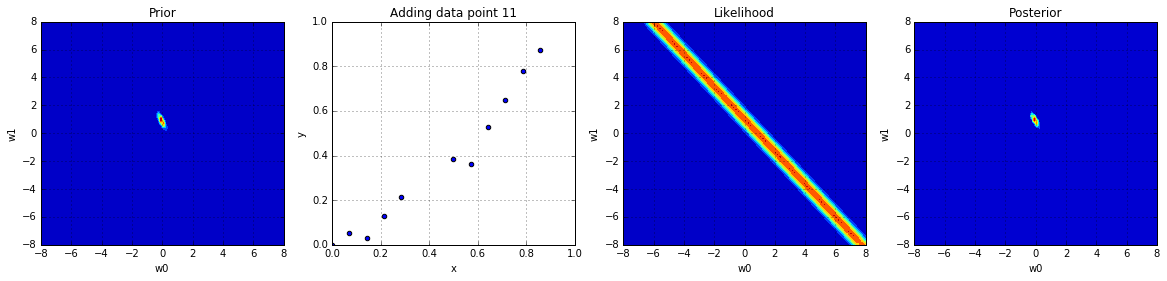

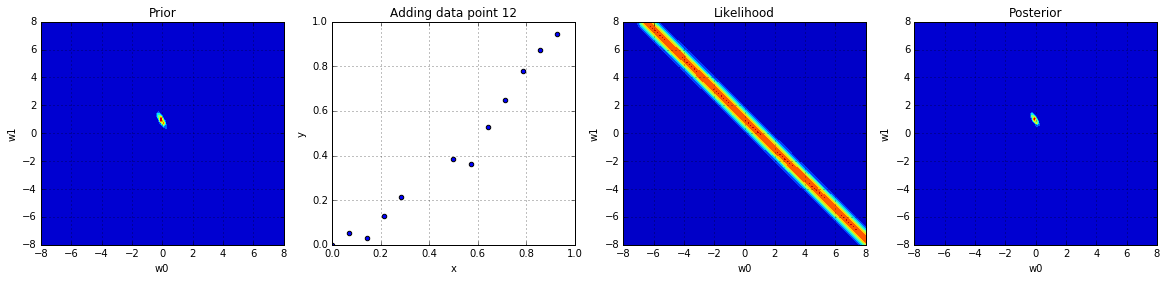

In [57]:
#Answer.
#Note: Variable names may be different to what we have used so far. For instance, S_N = A.

order = 1
mu_w = np.zeros((2,1))
alpha = 2**-1 #prior alpha
beta =  0.3**-2
A = np.linalg.pinv(1/alpha*np.eye(order+1))

#plot settings
w0 = np.linspace(-8,8,100)
w1 = np.linspace(-8,8,100)
xeva, yeva = np.meshgrid(w0,w1)
pos = np.empty(xeva.shape+(2,))
pos[:,:,0] = xeva
pos[:,:,1] = yeva
    
for itr in range(1, x.shape[0]):   
    #prior
    prior = multivariate_normal(mu_w.T[0,:], np.linalg.pinv(A))
    prior_pdf = prior.pdf(pos)
    
    #Likelihood
    theta = generate_feature_mat(x[0:itr,:],order)
    w0_like = y[itr-1,:] - w1*x[itr-1,:]
    likelihood_temp = multivariate_normal(np.array([w0_like[0],w1[0]]), 1/beta*np.eye(order+1))
    likelihood_pdf = likelihood_temp.pdf(pos)
    for i in range(2,w0.shape[0]):
        likelihood_temp = multivariate_normal(np.array([w0_like[i],w1[i]]), 1/beta*np.eye(order+1))
        likelihood_pdf = np.maximum(likelihood_pdf,likelihood_temp.pdf(pos)) 

    #posterior (analytical)
    A = beta*theta.T.dot(theta) + alpha*np.eye((order+1))
    mu_w = beta*np.linalg.pinv(A).dot(theta.T.dot(y[0:itr,:]))
    posterior = multivariate_normal(mu_w[:,0], np.linalg.pinv(A))
    posterior_pdf = posterior.pdf(pos)

    #plot
    fig, ax = pl.subplots(1,4,figsize=(5*4,4))
    ax[0].contourf(xeva,yeva,prior_pdf); ax[0].set_xlabel('w0');  ax[0].set_ylabel('w1'); ax[0].axis([-8,8,-8,8]); ax[0].grid(True); ax[0].set_title('Prior')
    ax[1].scatter(x[0:itr,0],y[0:itr,0]); ax[1].set_xlabel('x');  ax[1].set_ylabel('y'); ax[1].axis([0,1,0,1]); ax[1].grid(True); ax[1].set_title('Adding data point {}'.format(itr))
    ax[2].contourf(xeva,yeva,likelihood_pdf); ax[2].set_xlabel('w0');  ax[2].set_ylabel('w1'); ax[2].axis([-8,8,-8,8]); ax[2].grid(True); ax[2].set_title('Likelihood')  
    ax[3].contourf(xeva,yeva,posterior_pdf); ax[3].set_xlabel('w0');  ax[3].set_ylabel('w1'); ax[3].axis([-8,8,-8,8]); ax[3].grid(True) ; ax[3].set_title('Posterior')

### Hyper-priors

\begin{equation}
 \underbrace{p(\mathbf{w},\boldsymbol\alpha|\mathbf{x,y})}_\text{posterior} 
    = \frac{
    	\overbrace{p(\mathbf{y} \vert \mathbf{x,w})}^\text{likelihood} 
        \times 
        \overbrace{p(\mathbf{w}\vert \boldsymbol\alpha)}^\text{prior}
         \times 
        \overbrace{p(\boldsymbol\alpha)}^\text{hyper-prior}} 
    {\underbrace{p(\mathbf{y})}_\text{marginal likelihood}}
\end{equation}

### Approximate Bayesian Inference

[Conjugate prior.](https://en.wikipedia.org/wiki/Conjugate_prior)

\begin{equation}
    \underbrace{q(\mathbf{w})}_{\substack{\text{approx.}\\\text{posterior}}}
	\approx \underbrace{p(\mathbf{w},|\mathbf{x,y})}_\text{posterior} 
    = \frac{
    	\overbrace{p(\mathbf{y} \vert \mathbf{x,w})}^\text{likelihood} 
        \times 
        \overbrace{p(\mathbf{w})}^\text{prior}
         } 
    {\underbrace{p(\mathbf{y})}_\text{marginal likelihood}}
\end{equation}

* Markov-Chain Mante Carlo (MCMC)
* Variational Inference

## 3. Gaussian Process for Regression

Gaussian process (GP) regression is a Bayesian non-parametric (non-parametric means the complexity grows with the amount of data) method. Use GP regression method in *sklearn* to make predictions for the following dataset. Explain the reason for higher variance around $x_q = 2$.

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [28]:
def f(x):
    return x * np.sin(x)

#generate data
x = np.atleast_2d([1., 4., 5., 6., 7., 8.]).T
y = f(x).ravel()

#query points
x_q = np.linspace(0.5, 8.5, 200)[:,np.newaxis] 

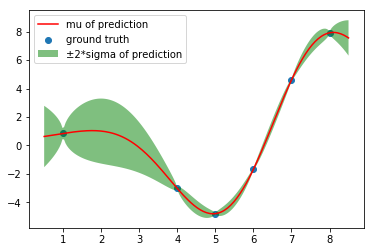

In [31]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
gp.fit(x, y)  
y_pred, sigma2_pred = gp.predict(x_q, return_std=True)

pl.scatter(x, y, label='ground truth')
pl.fill_between(x_q.ravel(), y_pred-2*np.sqrt(sigma2_pred), y_pred+2*np.sqrt(sigma2_pred), \
                facecolor='green', interpolate=True, alpha=0.5, label='±2*sigma of prediction')
pl.plot(x_q, y_pred, c='r', label='mu of prediction')
pl.legend(loc='upper left')

#The smaller the number of data points in a given area, the higher the uncertainty (variance) of prediction around that area. 